In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import seaborn as sns

%matplotlib inline
fig_dir = "/Users/crankshaw/model-serving/clipper_paper/ModelServingPaper/nsdi_2017/fake-figs"

log_loc = os.path.abspath("/Users/crankshaw/clipper/experiments_logs/feedback_caching")

results_files = []
for name in os.listdir(log_loc):
    if "results" in name:
        results_files.append(name)

exp_names = [f.split("_results")[0] for f in results_files]
print exp_names

['DEBUG_window_100_caching_OFF_160913-195823', 'DEBUG_window_100_caching_ON_160913-195655', 'DEBUG_window_1_caching_OFF_160913-195230', 'DEBUG_window_1_caching_ON_160913-195105', 'DEBUG_window_20_caching_OFF_160913-195525', 'DEBUG_window_20_caching_ON_160913-195358']


In [8]:
def get_results(fname):
    res_fname = fname + "_results.json"
    conf_fname = fname + "_config.json"
    with open(os.path.join(log_loc, res_fname), "r") as rf, open(os.path.join(log_loc, conf_fname), "r") as cf:
        results = json.load(rf)
        conf = json.load(cf)
        cache_off = conf["clipper_conf"]["salt_cache"]
        window_size = conf["clipper_conf"]["window_size"]
        update_cache_rate = [rc["ratio"] for rc in results["ratio_counters"] if rc["name"] == "update_cache_hits"][0]
        update_thruput = [m["rate"] for m in results["meters"] if m["name"] == "update_thruput"][0]
    return (cache_off, window_size, update_cache_rate, update_thruput)

extracted_results = [get_results(e) for e in exp_names]

In [21]:
print extracted_results
extracted_results.sort()
print extracted_results

[(True, 100, 0.0, 205.35901650344815), (False, 100, 0.9982941899065739, 617.3456204095537), (True, 1, 0.0, 6707.6534128048825), (False, 1, 0.95238593119256, 10928.837632049186), (True, 20, 0.0, 913.4545977901888), (False, 20, 0.9759193872521953, 2614.4455585241767)]
[(False, 1, 0.95238593119256, 10928.837632049186), (False, 20, 0.9759193872521953, 2614.4455585241767), (False, 100, 0.9982941899065739, 617.3456204095537), (True, 1, 0.0, 6707.6534128048825), (True, 20, 0.0, 913.4545977901888), (True, 100, 0.0, 205.35901650344815)]


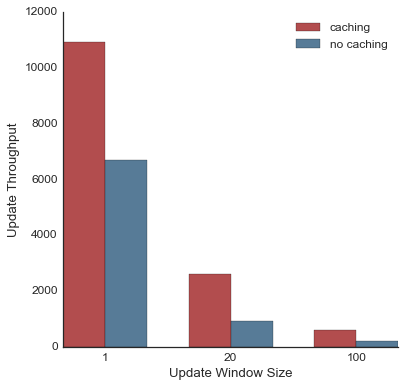

In [24]:
# caching_state, window_size, update_rate, update_thruput = zip(*extracted_results)
# df = pd.DataFrame({"cache_off": batches, "latencies": latencies})

extracted_results.sort()
cache_state, windows, hit_rate, cache_on_thrus = zip(*extracted_results[:3])
cache_state, windows, hit_rate, cache_off_thrus = zip(*extracted_results[3:])





# cache_state, windows, cache_off_thrus = zip(*caching_off)[0]
# print windows
# cache_state, windows, cache_on_thrus = zip(*caching_on)[0]

# sns.set_palette("Paired")
# sns.set_style("whitegrid", {"axes.grid": "False"})

colors = sns.color_palette("Set1", n_colors=8, desat=.5)


fig, ax = plt.subplots(figsize=(6,6))
sns.set_style("white")
sns.set_context("paper", font_scale=1.5,)
sns.despine()
width = 1
ax.bar(np.arange(len(cache_off_thrus))*width*3,  cache_on_thrus, width=width, color=colors[0], label="caching")
ax.bar(np.arange(len(cache_off_thrus))*width*3 + 1,  cache_off_thrus, width=width, color=colors[1], label="no caching")




# thrus = [(m["name"].split(":")[0], m["rate"]) for m in aimd_results["meters"] if "model_thruput" in m["name"]]
# names, rates = zip(*thrus)
# ax.bar(np.arange(len(rates))*width*4 + width,  rates, width=width, color="red", label="aimd")
# ax.bar(np.arange(len(rates))*width*4 + width*2,  np.ones(len(rates))*1000, width=width, color="green", label="NO BATCHING PLACEHOLDER")

plt.xticks(np.arange(len(cache_off_thrus))*width*3 + 1, windows)
# ax.set_ylim(0, 11000)
ax.legend(loc=0)
ax.set_xlabel("Update Window Size")
ax.set_ylabel("Update Throughput")
# plt.show()
# ax.set_title("Throughput")
plt.savefig("%s/caching_for_feedback_thruput.pdf" % (fig_dir), bbox_inches='tight')

In [18]:
print caching_off

[(1, 1650.209261221375), (20, 285.56007714837756), (100, 60.23191936775616)]
